In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


#### 1.understanding the data  and handle coulmns 

In [27]:
## read the data
# Assuming the CSV file is in the same directory as this script
df = pd.read_csv('Employee_Payroll_Data__FMPS_Payroll_Costing_.csv')

In [28]:
# data overview
df.head(5)

,AMOUNT,FUND TYPE,FUND,DEPARTMENT FUNCTION,DEPARTMENT,APPROPRIATION,TITLE,EMPLOYEE DATASET ID,EMPLOYEE,PAY ELEMENT,PAYROLL YEAR,PAYROLL PERIOD,DEPARTMENT CODE,FUND CODE,APPROPRIATION CODE,TITLE CODE
0,3556.0,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T0109 - ACCOUNTING TECHNICIAN,EID0014732,"EID0014732 - TACCAD, CLARIBEL",REGULAR SALARY,2023,1,D54,F0100,A0005,T0109
1,3902.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T0303 - ADMINISTRATIVE ASST III,EID0008219,"EID0008219 - GRAYER, SHELIA D",REGULAR SALARY,2023,1,D54,F0100,A0005,T0303
2,3160.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T1405 - CITY PLANNER V,EID0061142,"EID0061142 - CORPUZ, BENJAMIN A",REGULAR SALARY,2023,1,D54,F0100,A0005,T1405
3,3711.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T1405 - CITY PLANNER V,EID0048953,"EID0048953 - THRUN, EMILY",REGULAR SALARY,2023,1,D54,F0100,A0005,T1405
4,3340.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T5402 - ARCHITECT II,EID0051155,"EID0051155 - BARTON, EMILY M",REGULAR SALARY,2023,1,D54,F0100,A0005,T5402


## some of the amounts are negative we need to know why ?

In [29]:
# describe the categorical columns 
print(df.describe())
print("="*200)
print(df.describe(include="O"))
print("="*200)
df.info()


             AMOUNT  PAYROLL YEAR  PAYROLL PERIOD
count  2.566767e+06  2.566767e+06    2.566767e+06
mean   2.694701e+03  2.023439e+03    1.117949e+01
std    2.360240e+03  4.962141e-01    6.532968e+00
min   -1.557815e+05  2.023000e+03    1.000000e+00
25%    8.440400e+02  2.023000e+03    6.000000e+00
50%    2.589000e+03  2.023000e+03    1.100000e+01
75%    4.286250e+03  2.024000e+03    1.600000e+01
max    4.009270e+05  2.024000e+03    2.400000e+01
             FUND TYPE                    FUND DEPARTMENT FUNCTION  \
count          2566767                 2566767             2566767   
unique               4                     208                   8   
top     CORPORATE FUND  F0100 - CORPORATE FUND       Public Safety   
freq           1749303                 1749303             1607996   

                             DEPARTMENT  \
count                           2566767   
unique                               40   
top     D57 - Chicago Police Department   
freq                       

In [30]:
df.head(5)

,AMOUNT,FUND TYPE,FUND,DEPARTMENT FUNCTION,DEPARTMENT,APPROPRIATION,TITLE,EMPLOYEE DATASET ID,EMPLOYEE,PAY ELEMENT,PAYROLL YEAR,PAYROLL PERIOD,DEPARTMENT CODE,FUND CODE,APPROPRIATION CODE,TITLE CODE
0,3556.0,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T0109 - ACCOUNTING TECHNICIAN,EID0014732,"EID0014732 - TACCAD, CLARIBEL",REGULAR SALARY,2023,1,D54,F0100,A0005,T0109
1,3902.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T0303 - ADMINISTRATIVE ASST III,EID0008219,"EID0008219 - GRAYER, SHELIA D",REGULAR SALARY,2023,1,D54,F0100,A0005,T0303
2,3160.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T1405 - CITY PLANNER V,EID0061142,"EID0061142 - CORPUZ, BENJAMIN A",REGULAR SALARY,2023,1,D54,F0100,A0005,T1405
3,3711.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T1405 - CITY PLANNER V,EID0048953,"EID0048953 - THRUN, EMILY",REGULAR SALARY,2023,1,D54,F0100,A0005,T1405
4,3340.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T5402 - ARCHITECT II,EID0051155,"EID0051155 - BARTON, EMILY M",REGULAR SALARY,2023,1,D54,F0100,A0005,T5402


In [31]:
# Clean the column names

df.columns = df.columns.str.replace(' ', '_', regex=True)
df.columns = df.columns.str.lower()

In [ ]:
# Remove the code from the 'code' column
def remove_code(x):
    if isinstance(x, str):
        parts = x.split(" - ", 1)
        return parts[1] if len(parts) > 1 else x
    return x

In [34]:
df.head()

,amount,fund_type,fund,department_function,department,appropriation,title,employee_dataset_id,employee,pay_element,payroll_year,payroll_period,department_code,fund_code,appropriation_code,title_code
0,3556.0,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T0109 - ACCOUNTING TECHNICIAN,EID0014732,"EID0014732 - TACCAD, CLARIBEL",REGULAR SALARY,2023,1,D54,F0100,A0005,T0109
1,3902.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T0303 - ADMINISTRATIVE ASST III,EID0008219,"EID0008219 - GRAYER, SHELIA D",REGULAR SALARY,2023,1,D54,F0100,A0005,T0303
2,3160.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T1405 - CITY PLANNER V,EID0061142,"EID0061142 - CORPUZ, BENJAMIN A",REGULAR SALARY,2023,1,D54,F0100,A0005,T1405
3,3711.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T1405 - CITY PLANNER V,EID0048953,"EID0048953 - THRUN, EMILY",REGULAR SALARY,2023,1,D54,F0100,A0005,T1405
4,3340.5,CORPORATE FUND,F0100 - CORPORATE FUND,City Development,D54 - Department of Planning and Development,A0005 - SALARIES AND WAGES - ON PAYROLL,T5402 - ARCHITECT II,EID0051155,"EID0051155 - BARTON, EMILY M",REGULAR SALARY,2023,1,D54,F0100,A0005,T5402


In [35]:
coulmnns_to_clean = ["fund", "department","appropriation","title","employee_dataset_id","employee"]

In [36]:
for cols in coulmnns_to_clean:
    df[cols] = df[cols].apply(remove_code)

In [37]:
df

,amount,fund_type,fund,department_function,department,appropriation,title,employee_dataset_id,employee,pay_element,payroll_year,payroll_period,department_code,fund_code,appropriation_code,title_code
0,3556.0,CORPORATE FUND,CORPORATE FUND,City Development,Department of Planning and Development,SALARIES AND WAGES - ON PAYROLL,ACCOUNTING TECHNICIAN,EID0014732,"TACCAD, CLARIBEL",REGULAR SALARY,2023,1,D54,F0100,A0005,T0109
1,3902.5,CORPORATE FUND,CORPORATE FUND,City Development,Department of Planning and Development,SALARIES AND WAGES - ON PAYROLL,ADMINISTRATIVE ASST III,EID0008219,"GRAYER, SHELIA D",REGULAR SALARY,2023,1,D54,F0100,A0005,T0303
2,3160.5,CORPORATE FUND,CORPORATE FUND,City Development,Department of Planning and Development,SALARIES AND WAGES - ON PAYROLL,CITY PLANNER V,EID0061142,"CORPUZ, BENJAMIN A",REGULAR SALARY,2023,1,D54,F0100,A0005,T1405
3,3711.5,CORPORATE FUND,CORPORATE FUND,City Development,Department of Planning and Development,SALARIES AND WAGES - ON PAYROLL,CITY PLANNER V,EID0048953,"THRUN, EMILY",REGULAR SALARY,2023,1,D54,F0100,A0005,T1405
4,3340.5,CORPORATE FUND,CORPORATE FUND,City Development,Department of Planning and Development,SALARIES AND WAGES - ON PAYROLL,ARCHITECT II,EID0051155,"BARTON, EMILY M",REGULAR SALARY,2023,1,D54,F0100,A0005,T5402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566762,3241.5,GRANT FUNDS,BUILDING EPIDEMIOLOGY AND HEALTH IT CAPA,Community Services,Department of Public Health,SALARIES AND WAGES - ON PAYROLL,PUBLIC HEALTH ADM III - EXCLUDED,EID0062954,"WAHBEH, HAIFA",REGULAR SALARY,2024,14,D41,FGA42,A0005,T3464
2566763,3241.5,GRANT FUNDS,BUILDING EPIDEMIOLOGY AND HEALTH IT CAPA,Community Services,Department of Public Health,SALARIES AND WAGES - ON PAYROLL,PUBLIC HEALTH ADM III - EXCLUDED,EID0062954,"WAHBEH, HAIFA",REGULAR SALARY,2024,15,D41,FGA42,A0005,T3464
2566764,3241.5,GRANT FUNDS,BUILDING EPIDEMIOLOGY AND HEALTH IT CAPA,Community Services,Department of Public Health,SALARIES AND WAGES - ON PAYROLL,PUBLIC HEALTH ADM III - EXCLUDED,EID0062954,"WAHBEH, HAIFA",REGULAR SALARY,2024,16,D41,FGA42,A0005,T3464
2566765,3241.5,GRANT FUNDS,BUILDING EPIDEMIOLOGY AND HEALTH IT CAPA,Community Services,Department of Public Health,SALARIES AND WAGES - ON PAYROLL,PUBLIC HEALTH ADM III - EXCLUDED,EID0062954,"WAHBEH, HAIFA",REGULAR SALARY,2024,17,D41,FGA42,A0005,T3464


# 2. EDA and extracting Featurs

In [73]:
## univariate analysis

In [68]:
sns.set(style="whitegrid")

# 1. Which departments spend the most on salaries?


C:\Users\ahmed hamdi\AppData\Local\Temp\ipykernel_12580\4285994271.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_salary.values, y=dept_salary.index, palette="viridis")


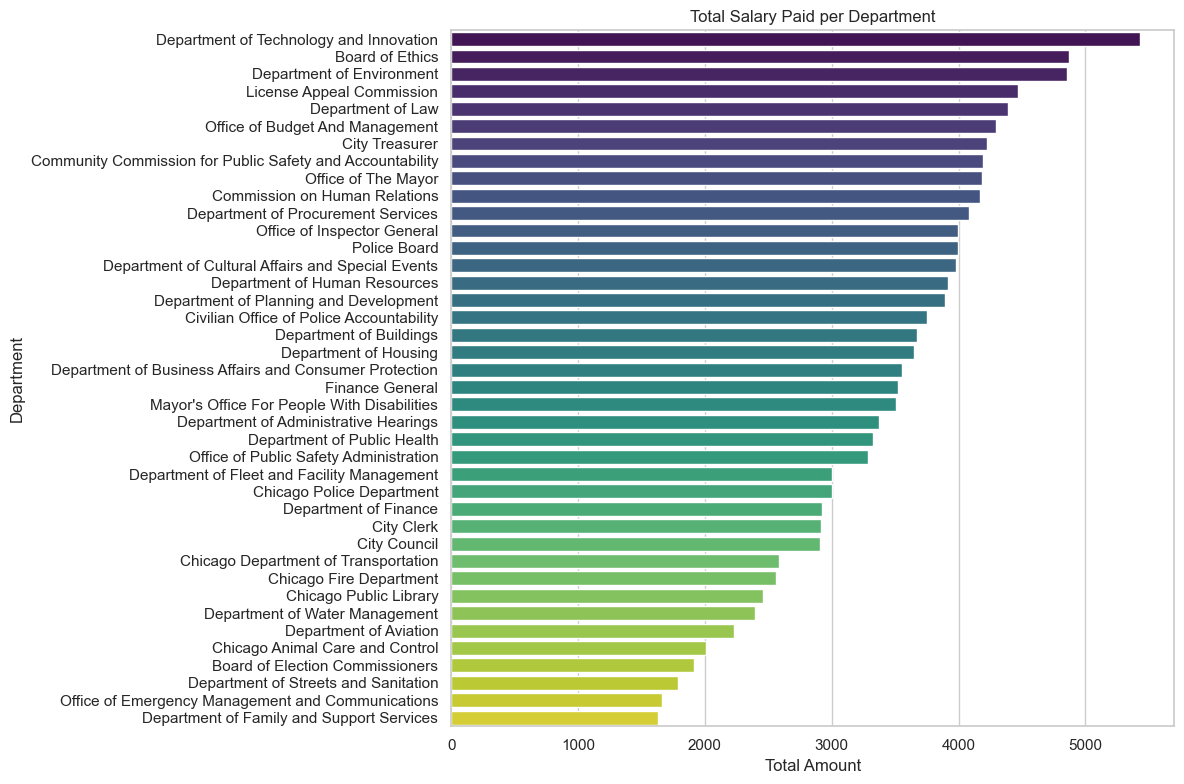

department
Department of Technology and Innovation    5428.419431
Board of Ethics                            4874.319342
Department of Environment                  4858.958427
License Appeal Commission                  4467.511628
Department of Law                          4390.512725
Name: amount, dtype: float64




In [85]:
# Total Salary Paid per Department
dept_salary = df.groupby("department")["amount"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=dept_salary.values, y=dept_salary.index, palette="viridis")
plt.title("Total Salary Paid per Department")
plt.xlabel("Total Amount")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

print(f"{dept_salary.head(5)}\n\n")

### 2. Which job titles are the highest paid on average?

C:\Users\ahmed hamdi\AppData\Local\Temp\ipykernel_12580\25418750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_avg_salary.values, y=title_avg_salary.index, palette="coolwarm")


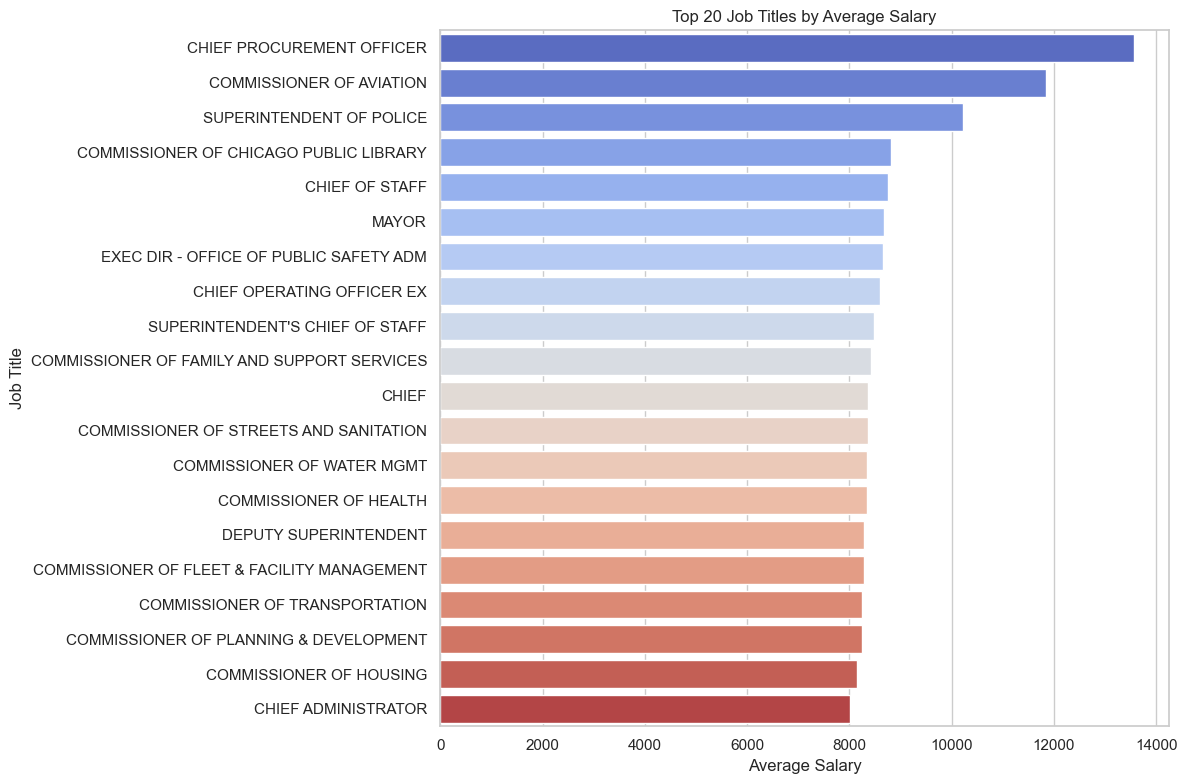

title
CHIEF PROCUREMENT OFFICER                      13569.537907
COMMISSIONER OF AVIATION                       11837.880952
SUPERINTENDENT OF POLICE                       10215.043571
COMMISSIONER OF CHICAGO PUBLIC LIBRARY          8815.095238
CHIEF OF STAFF                                  8756.932391
MAYOR                                           8682.555000
EXEC DIR - OFFICE OF PUBLIC SAFETY ADM          8654.904000
CHIEF OPERATING OFFICER EX                      8592.315789
SUPERINTENDENT'S CHIEF OF STAFF                 8475.068966
COMMISSIONER OF FAMILY AND SUPPORT SERVICES     8416.166667
Name: amount, dtype: float64




In [86]:
# Average Salary by Job Title
title_avg_salary = df.groupby("title")["amount"].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=title_avg_salary.values, y=title_avg_salary.index, palette="coolwarm")
plt.title("Top 20 Job Titles by Average Salary")
plt.xlabel("Average Salary")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()
print(f"{title_avg_salary.head(10)}\n\n")

### 3. Who are the top earning employees?

C:\Users\ahmed hamdi\AppData\Local\Temp\ipykernel_12580\1228690842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_earners.values, y=top_earners.index, palette="magma")


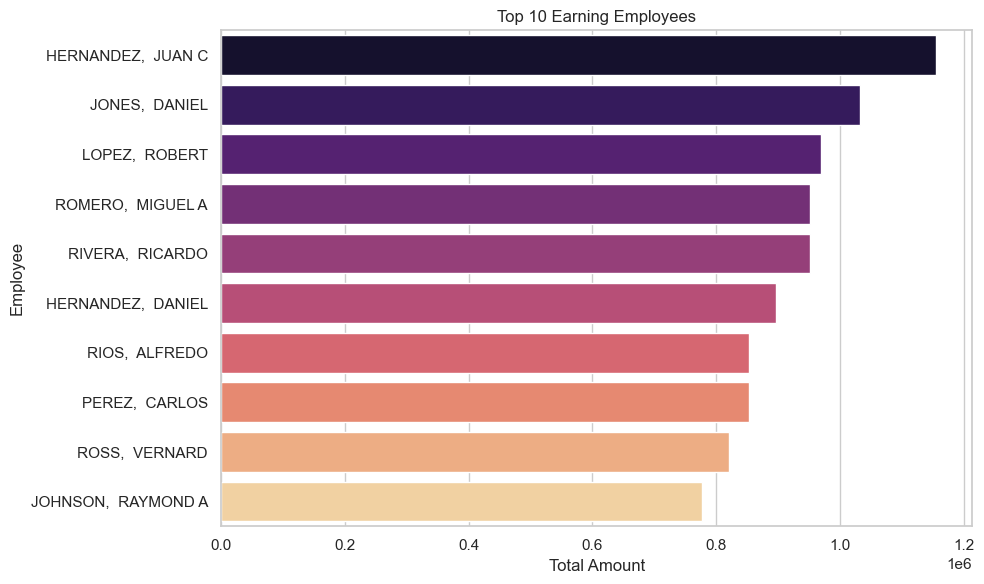

employee
HERNANDEZ,  JUAN C     1155929.30
JONES,  DANIEL         1031651.90
LOPEZ,  ROBERT          968976.37
ROMERO,  MIGUEL A       951977.19
RIVERA,  RICARDO        951229.33
HERNANDEZ,  DANIEL      896243.08
RIOS,  ALFREDO          853485.35
PEREZ,  CARLOS          852959.79
ROSS,  VERNARD          820114.96
JOHNSON,  RAYMOND A     777460.88
Name: amount, dtype: float64




In [87]:
# Top Earning Employees
top_earners = df.groupby("employee")["amount"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_earners.values, y=top_earners.index, palette="magma")
plt.title("Top 10 Earning Employees")
plt.xlabel("Total Amount")
plt.ylabel("Employee")
plt.tight_layout()
plt.show()
print(f"{top_earners.head(10)}\n\n")

## 4. How does payroll vary across time?

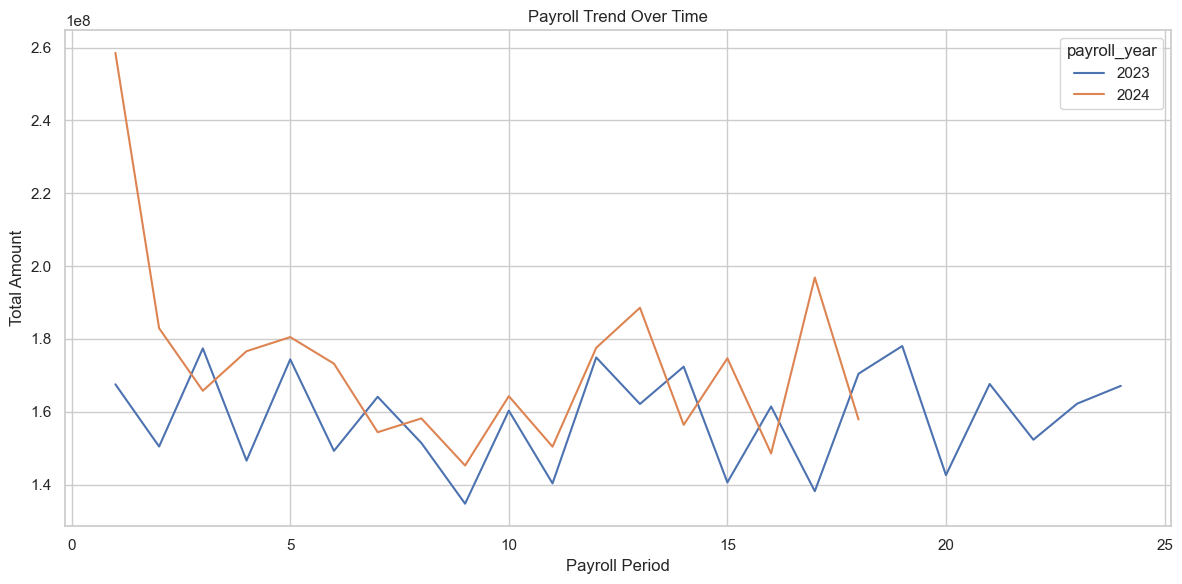

In [78]:
# Trend Over Payroll Periods (if you have multiple years)
payroll_trend = df.groupby(["payroll_year", "payroll_period"])["amount"].sum().unstack().T
payroll_trend.plot(figsize=(12, 6), title="Payroll Trend Over Time")
plt.xlabel("Payroll Period")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()


## 5. How are salary funds distributed by fund type?

C:\Users\ahmed hamdi\AppData\Local\Temp\ipykernel_12580\566183699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fund_salary.values, y=fund_salary.index, palette="cubehelix")


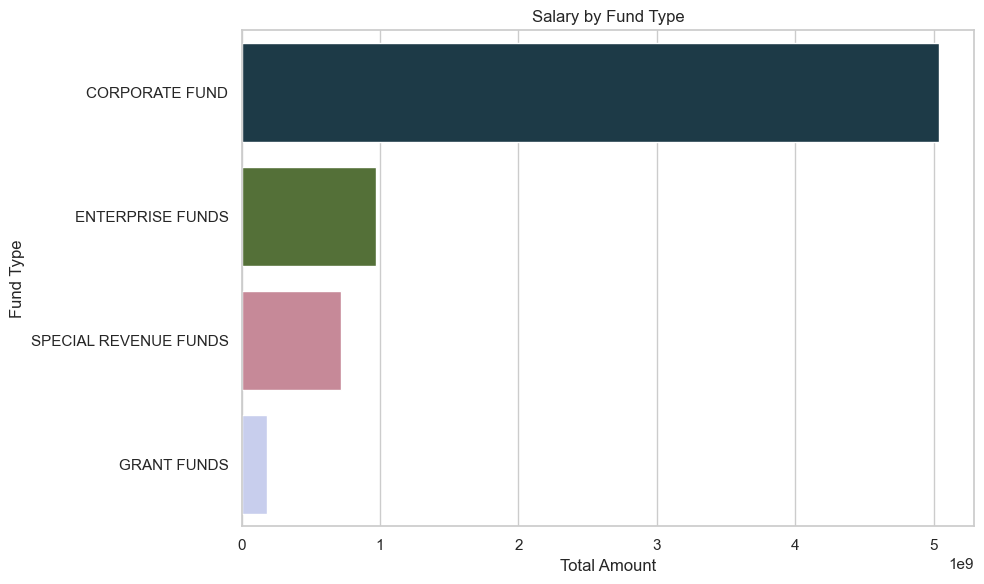

In [80]:
# Salary Breakdown by Fund Type
fund_salary = df.groupby("fund_type")["amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=fund_salary.values, y=fund_salary.index, palette="cubehelix")
plt.title("Salary by Fund Type")
plt.xlabel("Total Amount")
plt.ylabel("Fund Type")
plt.tight_layout()
plt.show()

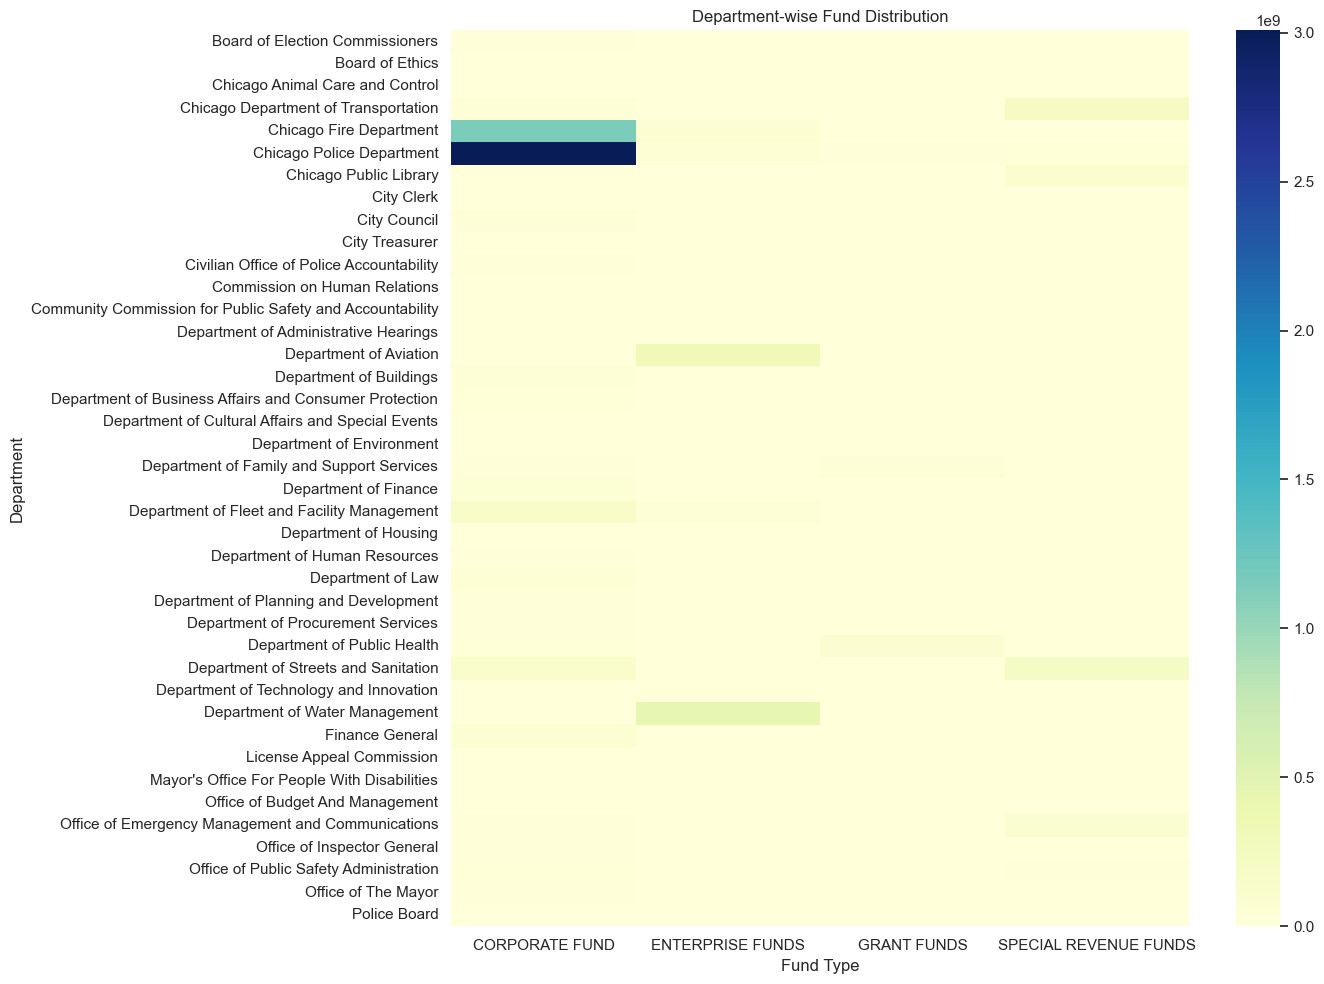

In [82]:
# Department-wise Fund Distribution
fund_distribution = pd.crosstab(df["department"], df["fund_type"], values=df["amount"], aggfunc="sum").fillna(0)
plt.figure(figsize=(14, 10))
sns.heatmap(fund_distribution, cmap="YlGnBu")
plt.title("Department-wise Fund Distribution")
plt.xlabel("Fund Type")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


C:\Users\ahmed hamdi\AppData\Local\Temp\ipykernel_12580\3380368773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.values, y=title_counts.index, palette="Blues_r")


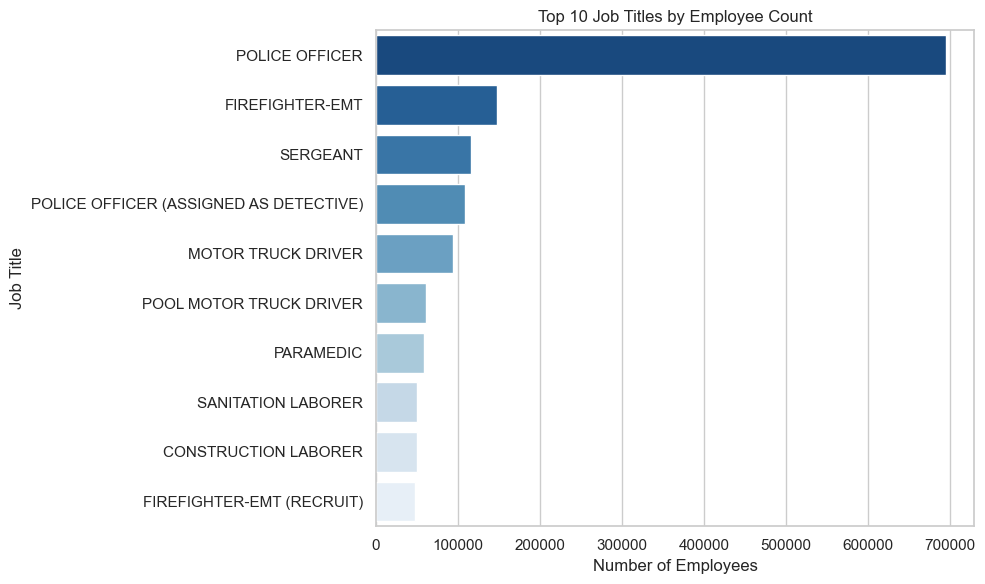

In [83]:
# Count of Employees by Title
title_counts = df["title"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.values, y=title_counts.index, palette="Blues_r")
plt.title("Top 10 Job Titles by Employee Count")
plt.xlabel("Number of Employees")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

C:\Users\ahmed hamdi\AppData\Local\Temp\ipykernel_12580\3173623755.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="Greens_r")


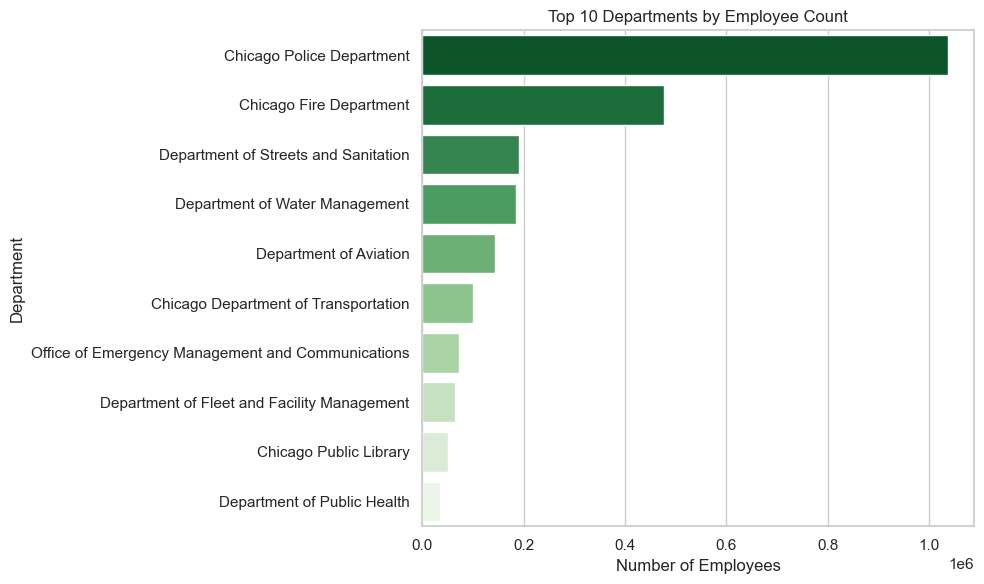

In [84]:
# Count of Employees by Department
dept_counts = df["department"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="Greens_r")
plt.title("Top 10 Departments by Employee Count")
plt.xlabel("Number of Employees")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


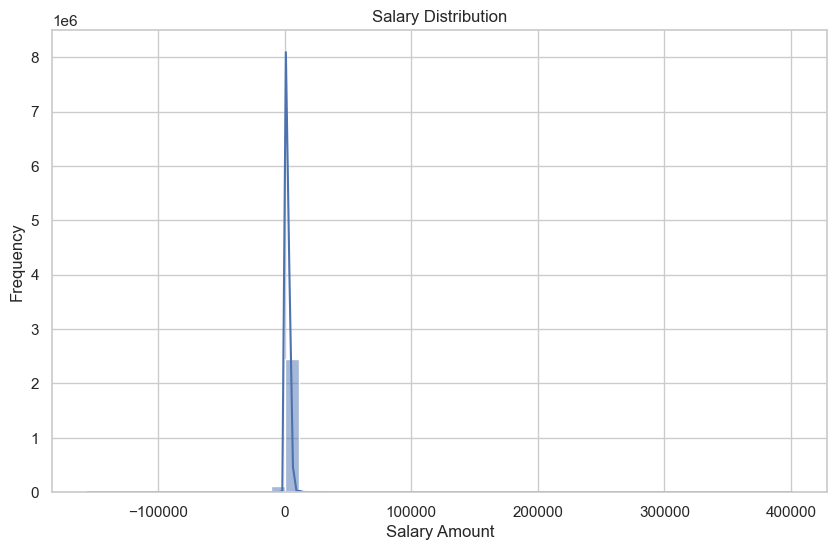

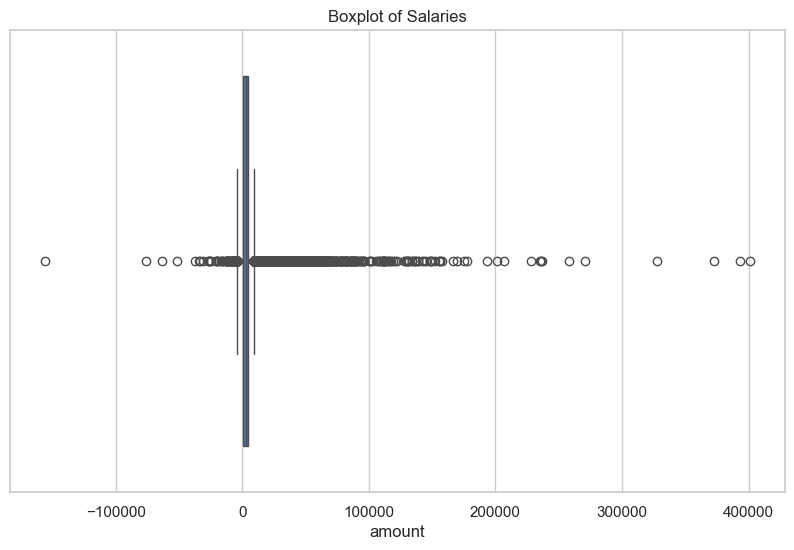

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df["amount"], bins=50, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["amount"])
plt.title("Boxplot of Salaries")
plt.show()

C:\Users\ahmed hamdi\AppData\Local\Temp\ipykernel_12580\4140587598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_total_salary.values, y=title_total_salary.index, palette="flare")


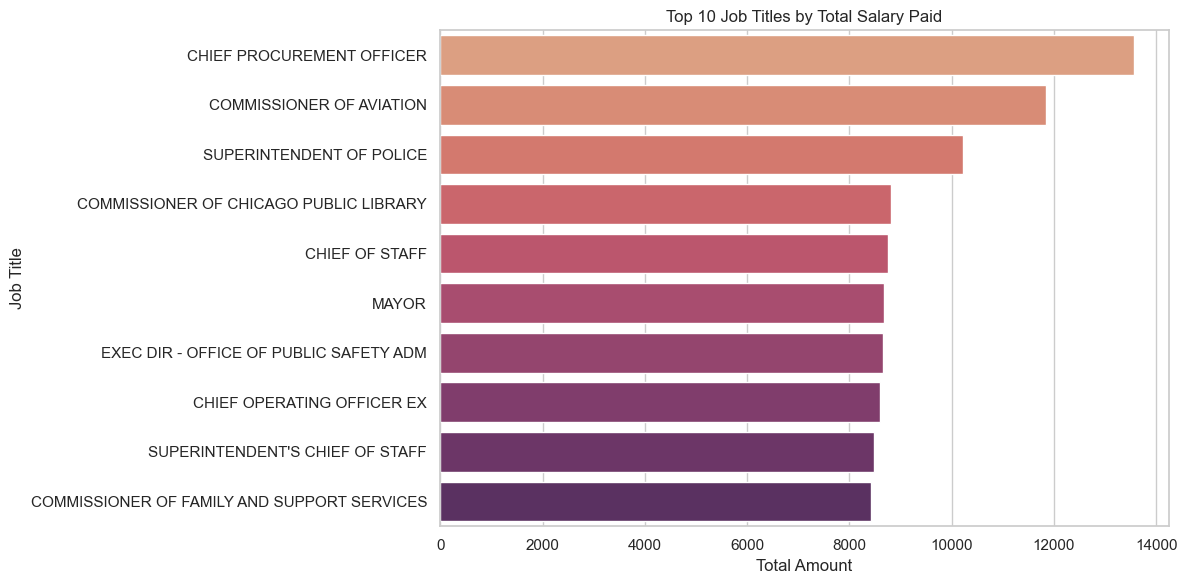

In [91]:
title_total_salary = df.groupby("title")["amount"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=title_total_salary.values, y=title_total_salary.index, palette="flare")
plt.title("Top 10 Job Titles by Total Salary Paid")
plt.xlabel("Total Amount")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

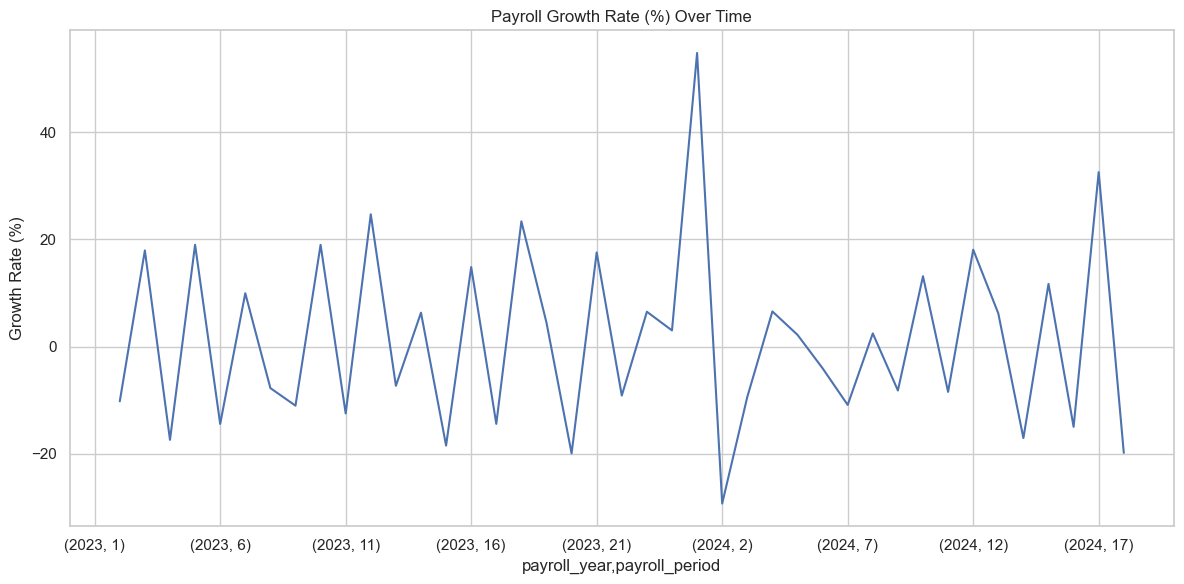

In [92]:
payroll_monthly = df.groupby(["payroll_year", "payroll_period"])["amount"].sum()
growth_rate = payroll_monthly.pct_change() * 100
growth_rate.plot(figsize=(12, 6), title="Payroll Growth Rate (%) Over Time")
plt.ylabel("Growth Rate (%)")
plt.tight_layout()
plt.show()


Found 23036 records with negative amounts

Negative Amounts Analysis:
                         count         mean          std       min        25%  \
pay_element                                                                     
ACT UP 1 RATE 1_0          3.0   -66.253333    68.525293   -138.40   -98.3600   
ACT UP 1 RATE 2_0          1.0   -17.560000          NaN    -17.56   -17.5600   
BABY FURLOUGH BUY BACK     6.0 -2391.008333  1369.303885  -4394.77 -3129.8325   
BIKE                       2.0  -250.000000     0.000000   -250.00  -250.0000   
CANINE OVERTIME            1.0  -700.000000          NaN   -700.00  -700.0000   
...                        ...          ...          ...       ...        ...   
TRAINING INSTRUCTOR PAY    4.0  -785.937500    93.358934   -871.00  -827.3125   
UNIFORM ALLOWANCE        175.0  -638.473600    90.153667  -1300.00  -650.0000   
VAC HR PAYOUT              2.0 -7371.900000  6841.258108 -12209.40 -9790.6500   
VAC SWN HR PAYOUT          4.0 -3469.3

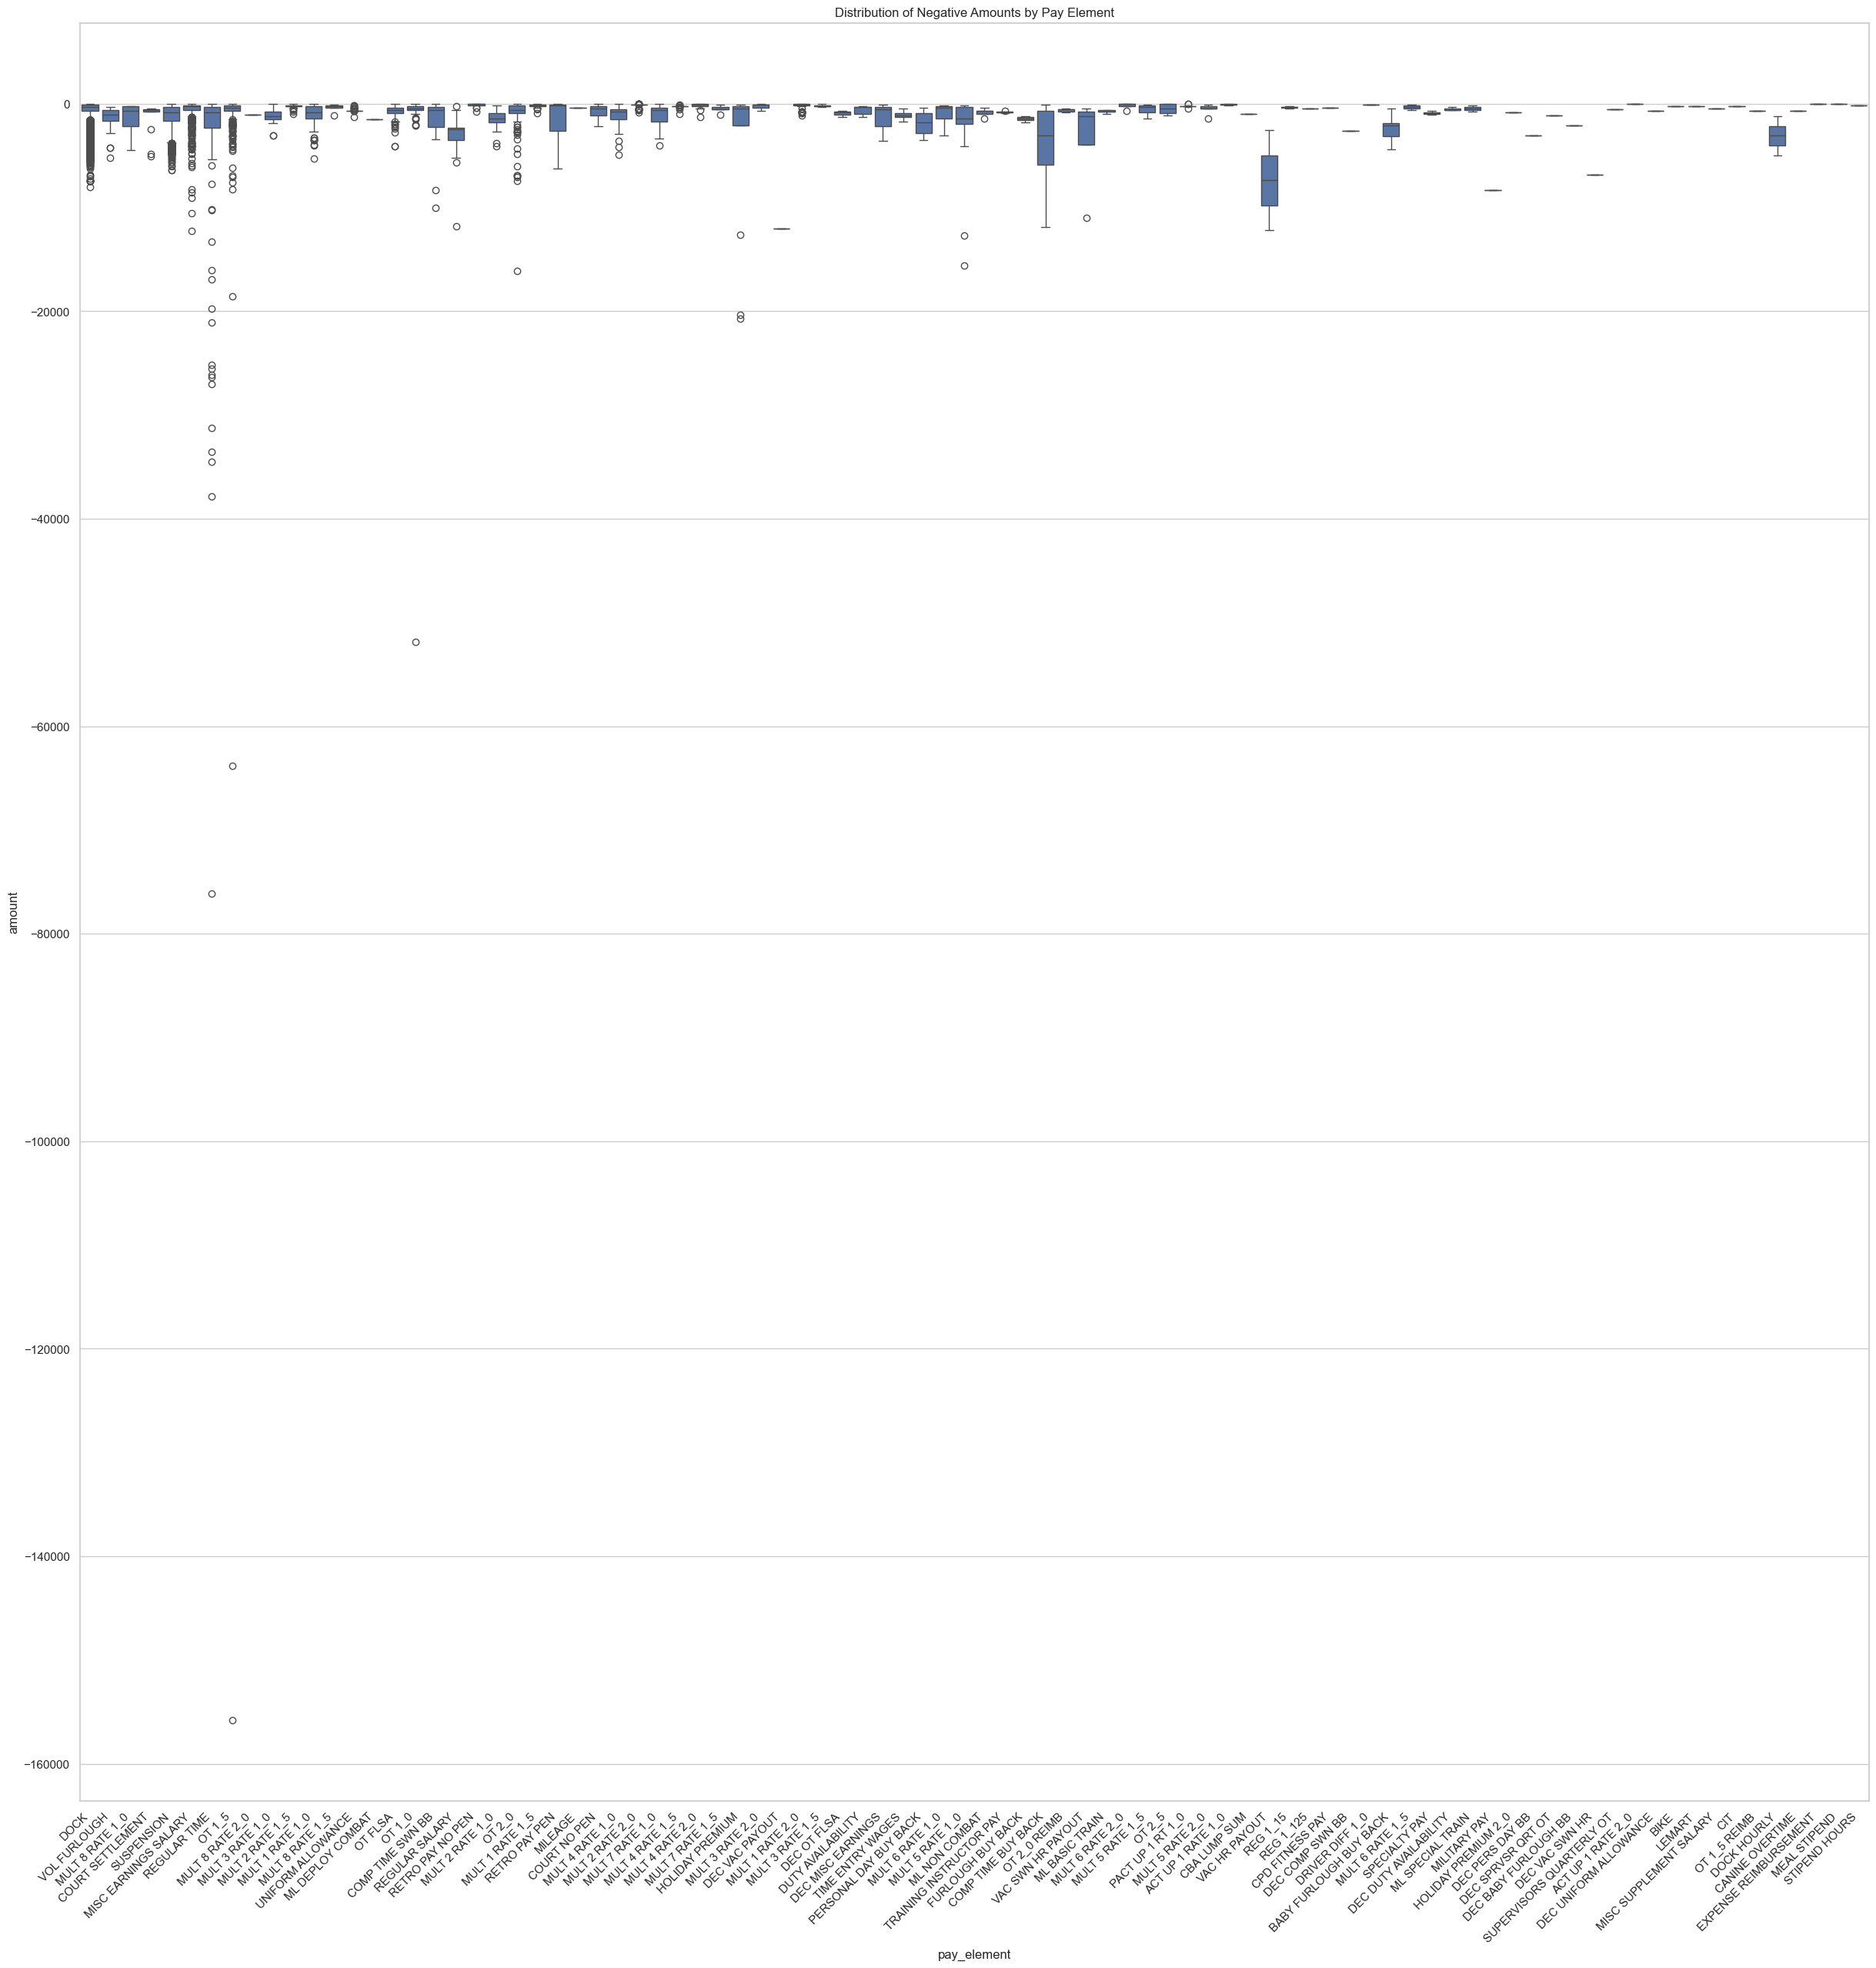

In [103]:
# Analyze negative amounts
neg_amounts = df[df['amount'] < 0]
print(f"\nFound {len(neg_amounts)} records with negative amounts")
if not neg_amounts.empty:
    print("\nNegative Amounts Analysis:")
    print(neg_amounts.groupby('pay_element')['amount'].describe())
    
    # Visualize negative amounts by pay element
    plt.figure(figsize=(30, 30))
    sns.boxplot(x='pay_element', y='amount', data=neg_amounts)
    plt.title('Distribution of Negative Amounts by Pay Element')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout